🔢 Average Quiz Scores by Type and Group:

Group  GILT   WEB
Type             
B       5.0  4.00
E       9.0  9.00
I       8.5  7.25


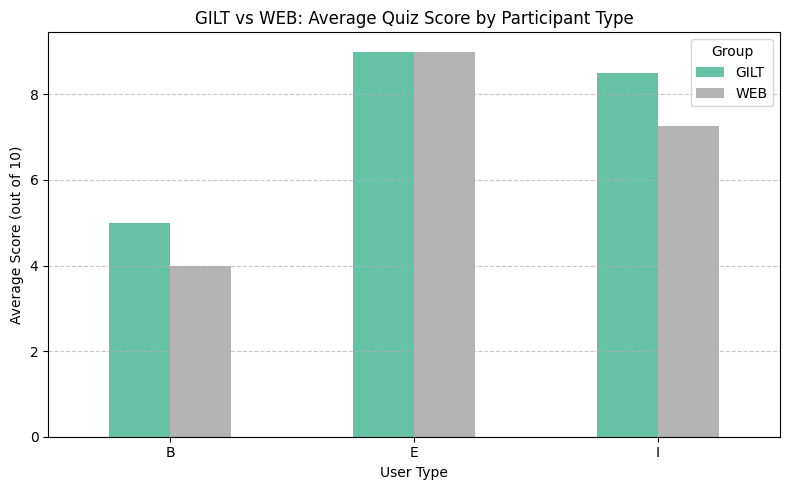

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine both datasets
data = [
    # First table
    ["Raj Shah", "WEB", 9, "E"],
    ["Khushboo Chandwani", "GILT", 10, "E"],
    ["Abhishek Abbi", "WEB", 6, "I"],
    ["Jash Shah", "GILT", 8, "I"],
    ["Pranshu Patel", "WEB", 7, "I"],
    ["Aditya Iyer", "WEB", 4, "B"],
    ["Maahi Shah", "GILT", 4, "B"],

    # Second table
    ["Raj Shah", "WEB", 9, "E"],
    ["Khushboo Chandwani", "GILT", 8, "E"],
    ["Dhruv Jain", "WEB", 8, "I"],
    ["Harsh Gajjar", "GILT", 9, "I"],
    ["Parth Vadodaria", "WEB", 8, "I"],
    ["Kunj Bhuva", "WEB", 4, "B"],
    ["Anjali Chandwani", "GILT", 6, "B"]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Name", "Group", "Quiz Score", "Type"])

# Create a pivot table to compare average scores
pivot = df.pivot_table(values="Quiz Score", index="Type", columns="Group", aggfunc="mean")
print("🔢 Average Quiz Scores by Type and Group:\n")
print(pivot)

# Plot grouped bar chart
pivot.plot(kind='bar', figsize=(8, 5), colormap='Set2', rot=0)
plt.title("GILT vs WEB: Average Quiz Score by Participant Type")
plt.ylabel("Average Score (out of 10)")
plt.xlabel("User Type")
plt.legend(title="Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from scipy import stats

# Combined dataset
data = [
    # Set 1
    ["Raj Shah", "WEB", "E", 9, "Y", "Y", "Y", "Y", "100%"],
    ["Khushboo Chandwani", "GILT", "E", 8, "Y", "Y", "Y", "Y", "100%"],
    ["Dhruv Jain", "WEB", "I", 8, "Y", "N", "Y", "Y", "75%"],
    ["Harsh Gajjar", "GILT", "I", 9, "Y", "Y", "Y", "Y", "100%"],
    ["Parth Vadodaria", "WEB", "I", 8, "N", "Y", "N", "N", "50%"],
    ["Kunj Bhuva", "WEB", "B", 4, "Y", "N", "Y", "Y", "50%"],
    ["Anjali Chandwani", "GILT", "B", 6, "Y", "Y", "Y", "N", "75%"],

    # Set 2
    ["Raj Shah", "WEB", "E", 9, "Y", "N", "Y", "Y", "75%"],
    ["Khushboo Chandwani", "GILT", "E", 10, "Y", "Y", "Y", "Y", "100%"],
    ["Abhishek Abbi", "WEB", "I", 6, "Y", "N", "Y", "N", "50%"],
    ["Jash Shah", "GILT", "I", 8, "Y", "Y", "Y", "Y", "100%"],
    ["Pranshu Patel", "WEB", "I", 7, "N", "Y", "N", "N", "25%"],
    ["Aditya Iyer", "WEB", "B", 4, "N", "N", "N", "N", "0%"],
    ["Maahi Shah", "GILT", "B", 4, "Y", "Y", "Y", "N", "75%"]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Name", "Group", "Type", "Quiz Score",
                                 "Subtask 1", "Subtask 2", "Subtask 3", "Subtask 4", "Completion Rate"])

# Convert Completion Rate from % string to float
df["Completion Rate"] = df["Completion Rate"].str.replace('%', '').astype(float)

# Separate groups
web_group = df[df["Group"] == "WEB"]
gilt_group = df[df["Group"] == "GILT"]

# Run Welch's t-test (doesn't assume equal variance)
quiz_t_stat, quiz_p = stats.ttest_ind(web_group["Quiz Score"], gilt_group["Quiz Score"], equal_var=False)
completion_t_stat, completion_p = stats.ttest_ind(web_group["Completion Rate"], gilt_group["Completion Rate"], equal_var=False)

# Show results
print("🎯 T-Test Results for WEB vs GILT\n")

print(f"📘 Quiz Score Comparison:\n  t-statistic = {quiz_t_stat:.4f}, p-value = {quiz_p:.4f}")
if quiz_p < 0.05:
    print("  ✅ Significant difference in quiz scores.")
else:
    print("  ❌ No significant difference in quiz scores.")

print(f"\n📗 Completion Rate Comparison:\n  t-statistic = {completion_t_stat:.4f}, p-value = {completion_p:.4f}")
if completion_p < 0.05:
    print("  ✅ Significant difference in completion rates.")
else:
    print("  ❌ No significant difference in completion rates.")


🎯 T-Test Results for WEB vs GILT

📘 Quiz Score Comparison:
  t-statistic = -0.5484, p-value = 0.5949
  ❌ No significant difference in quiz scores.

📗 Completion Rate Comparison:
  t-statistic = -3.1559, p-value = 0.0104
  ✅ Significant difference in completion rates.


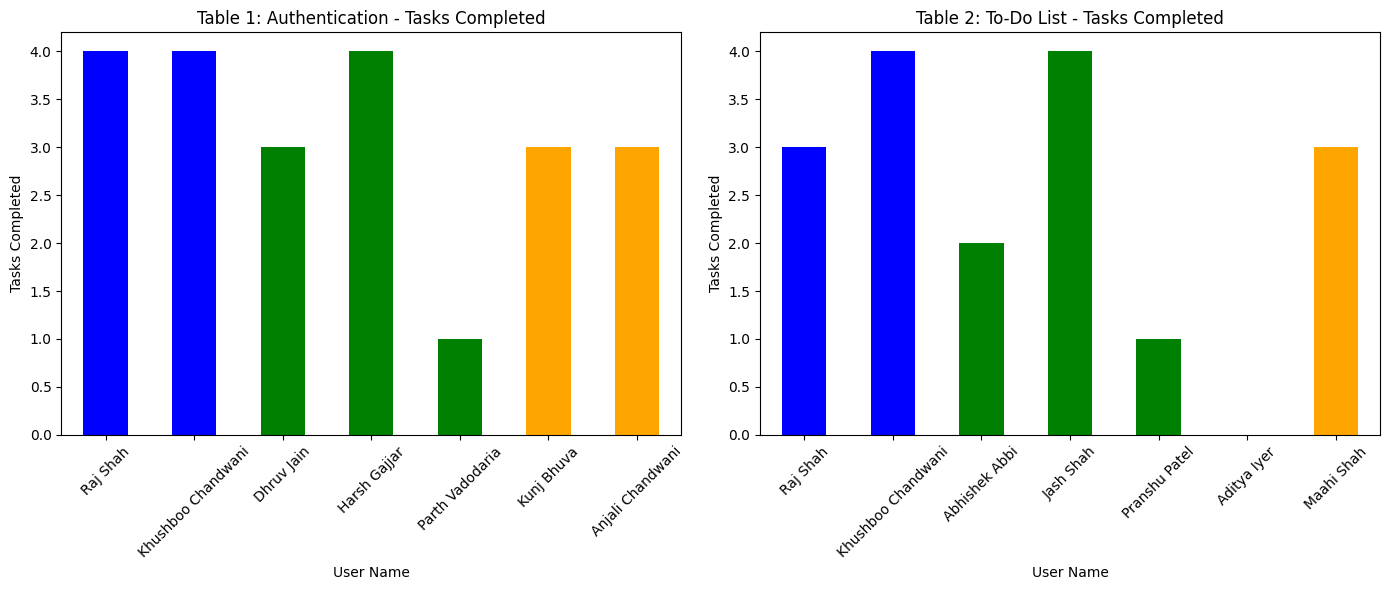

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for table 1 and table 2
data_1 = [
    ["Raj Shah", "WEB", "E", 9, "Y", "Y", "Y", "Y", "100%"],
    ["Khushboo Chandwani", "GILT", "E", 8, "Y", "Y", "Y", "Y", "100%"],
    ["Dhruv Jain", "WEB", "I", 8, "Y", "N", "Y", "Y", "75%"],
    ["Harsh Gajjar", "GILT", "I", 9, "Y", "Y", "Y", "Y", "100%"],
    ["Parth Vadodaria", "WEB", "I", 8, "N", "Y", "N", "N", "50%"],
    ["Kunj Bhuva", "WEB", "B", 4, "Y", "N", "Y", "Y", "50%"],
    ["Anjali Chandwani", "GILT", "B", 6, "Y", "Y", "Y", "N", "75%"]
]

data_2 = [
    ["Raj Shah", "WEB", "E", 9, "Y", "N", "Y", "Y", "75%"],
    ["Khushboo Chandwani", "GILT", "E", 10, "Y", "Y", "Y", "Y", "100%"],
    ["Abhishek Abbi", "WEB", "I", 6, "Y", "N", "Y", "N", "50%"],
    ["Jash Shah", "GILT", "I", 8, "Y", "Y", "Y", "Y", "100%"],
    ["Pranshu Patel", "WEB", "I", 7, "N", "Y", "N", "N", "25%"],
    ["Aditya Iyer", "WEB", "B", 4, "N", "N", "N", "N", "0%"],
    ["Maahi Shah", "GILT", "B", 4, "Y", "Y", "Y", "N", "75%"]
]

# Convert data to DataFrame
columns = ["Name", "Category", "Type", "Score", "Task1", "Task2", "Task3", "Task4", "Completion"]

df1 = pd.DataFrame(data_1, columns=columns)
df2 = pd.DataFrame(data_2, columns=columns)

# Task columns for counting completion
tasks = ['Task1', 'Task2', 'Task3', 'Task4']

# Counting completed tasks for each user in both tables
def task_counts(df):
    return df[tasks].apply(lambda row: (row == 'Y').sum(), axis=1)

df1['Completed Tasks'] = task_counts(df1)
df2['Completed Tasks'] = task_counts(df2)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Side-by-side subplots

# For Table 1 (Authentication)
df1['Color'] = df1['Type'].map({'E': 'blue', 'I': 'green', 'B': 'orange'})
df1.plot(kind='bar', x='Name', y='Completed Tasks', ax=axes[0], color=df1['Color'], legend=False)
axes[0].set_title('Table 1: Authentication - Tasks Completed')
axes[0].set_xlabel('User Name')
axes[0].set_ylabel('Tasks Completed')
axes[0].tick_params(axis='x', rotation=45)

# For Table 2 (To-Do List)
df2['Color'] = df2['Type'].map({'E': 'blue', 'I': 'green', 'B': 'orange'})
df2.plot(kind='bar', x='Name', y='Completed Tasks', ax=axes[1], color=df2['Color'], legend=False)
axes[1].set_title('Table 2: To-Do List - Tasks Completed')
axes[1].set_xlabel('User Name')
axes[1].set_ylabel('Tasks Completed')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


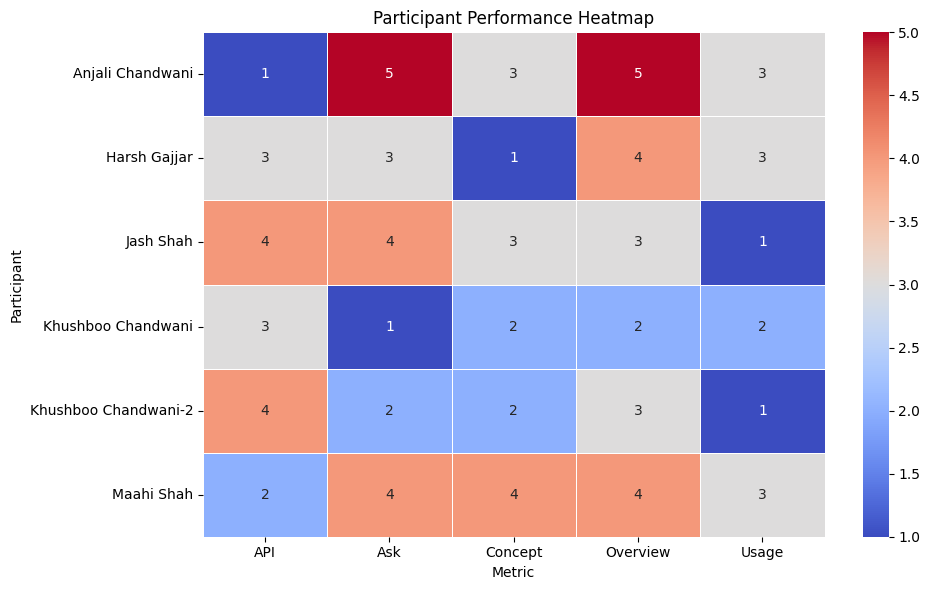

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data
data = {
    "Participant": [
        "Maahi Shah", "Anjali Chandwani", "Jash Shah", "Harsh Gajjar",
        "Khushboo Chandwani", "Khushboo Chandwani-2"
    ],
    "Task": ["To-Do", "Auth", "To-Do", "Auth", "To-Do", "Auth"],
    "Overview": [4, 5, 3, 4, 2, 3],
    "Ask": [4, 5, 4, 3, 1, 2],
    "API": [2, 1, 4, 3, 3, 4],
    "Concept": [4, 3, 3, 1, 2, 2],
    "Usage": [3, 3, 1, 3, 2, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Reshape for heatmap
df_melted = df.melt(id_vars=["Participant", "Task"], var_name="Metric", value_name="Score")

# Create heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df_melted.pivot_table(index="Participant", columns="Metric", values="Score", aggfunc="mean")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Participant Performance Heatmap")
plt.tight_layout()
plt.show()
